<a href="https://colab.research.google.com/github/baselshunnarah/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project Title: Prediction of Product Sales
Author: Basel Shunnarah

## Project Overview

## Load and Inspect Data

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import panda
import pandas as pd
file_path="/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

In [3]:
#read_the file

df_prediction=pd.read_csv(file_path)
df_prediction.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#info
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##info about the data
- there is 12 columns
- there is 8523 row

In [5]:
#data types
df_prediction.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [6]:
df_prediction.select_dtypes("object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [7]:
df_prediction.select_dtypes("number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976



##cleaning the data

In [8]:
#checking duplicates
df_duplicated=df_prediction.duplicated()
df_duplicated

,0
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [9]:
#sum of all duplicates
if df_duplicated.sum() > 0:
 print(f"Found {df_duplicated.sum()} duplicate rows:")
else:
  print("no duplicates found")


no duplicates found


In [10]:
# check dateframe for dublicates
missing_values = df_prediction.isna().sum()
missing_values

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [11]:
#Identifying % of missing data
percent_missing_values= missing_values / len(df_prediction)   *100
percent_missing_values[percent_missing_values>0]

,0
Item_Weight,17.165317
Outlet_Size,28.276428


missing values are :
- Item_Weight with 1463 missing values at 17.16%.
- Outlet_Size with 2410 missing values at 28.27%.

In [12]:
#check data type
df_prediction['Item_Weight'].dtypes

dtype('float64')

In [13]:
item_weight_count=df_prediction['Item_Weight'].value_counts(dropna=False)
item_weight_count.head()

,count
Item_Weight,
NaN,1463
12.15,86
17.60,82
13.65,77
11.80,76


In [14]:
# assignin the 0 to the missing values
df_prediction['Item_Weight']=df_prediction['Item_Weight'].fillna(0)
df_prediction['Item_Weight'].isna().sum()


np.int64(0)

In [15]:
df_prediction['Item_Weight'].value_counts(dropna=False)

,count
Item_Weight,
0.000,1463
12.150,86
17.600,82
13.650,77
11.800,76
...,...
5.210,2
9.420,1
7.685,1


In [16]:
#adressing outlet size missing vales
df_prediction['Outlet_Size'].value_counts(dropna=False)

,count
Outlet_Size,
Medium,2793
NaN,2410
Small,2388
High,932


In [17]:
# assign the word "missing" as place holder
df_prediction['Outlet_Size']=df_prediction['Outlet_Size'].fillna("missing")
df_prediction['Outlet_Size']

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,missing
4,High
...,...
8518,High
8519,missing
8520,Small
8521,Medium


In [18]:
df_prediction['Outlet_Size'].value_counts(dropna=False)

,count
Outlet_Size,
Medium,2793
missing,2410
Small,2388
High,932


In [19]:
#confirming there is no missing values in dataframe
missing_values_null = df_prediction.isna().sum()
missing_values_null

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


<Axes: >

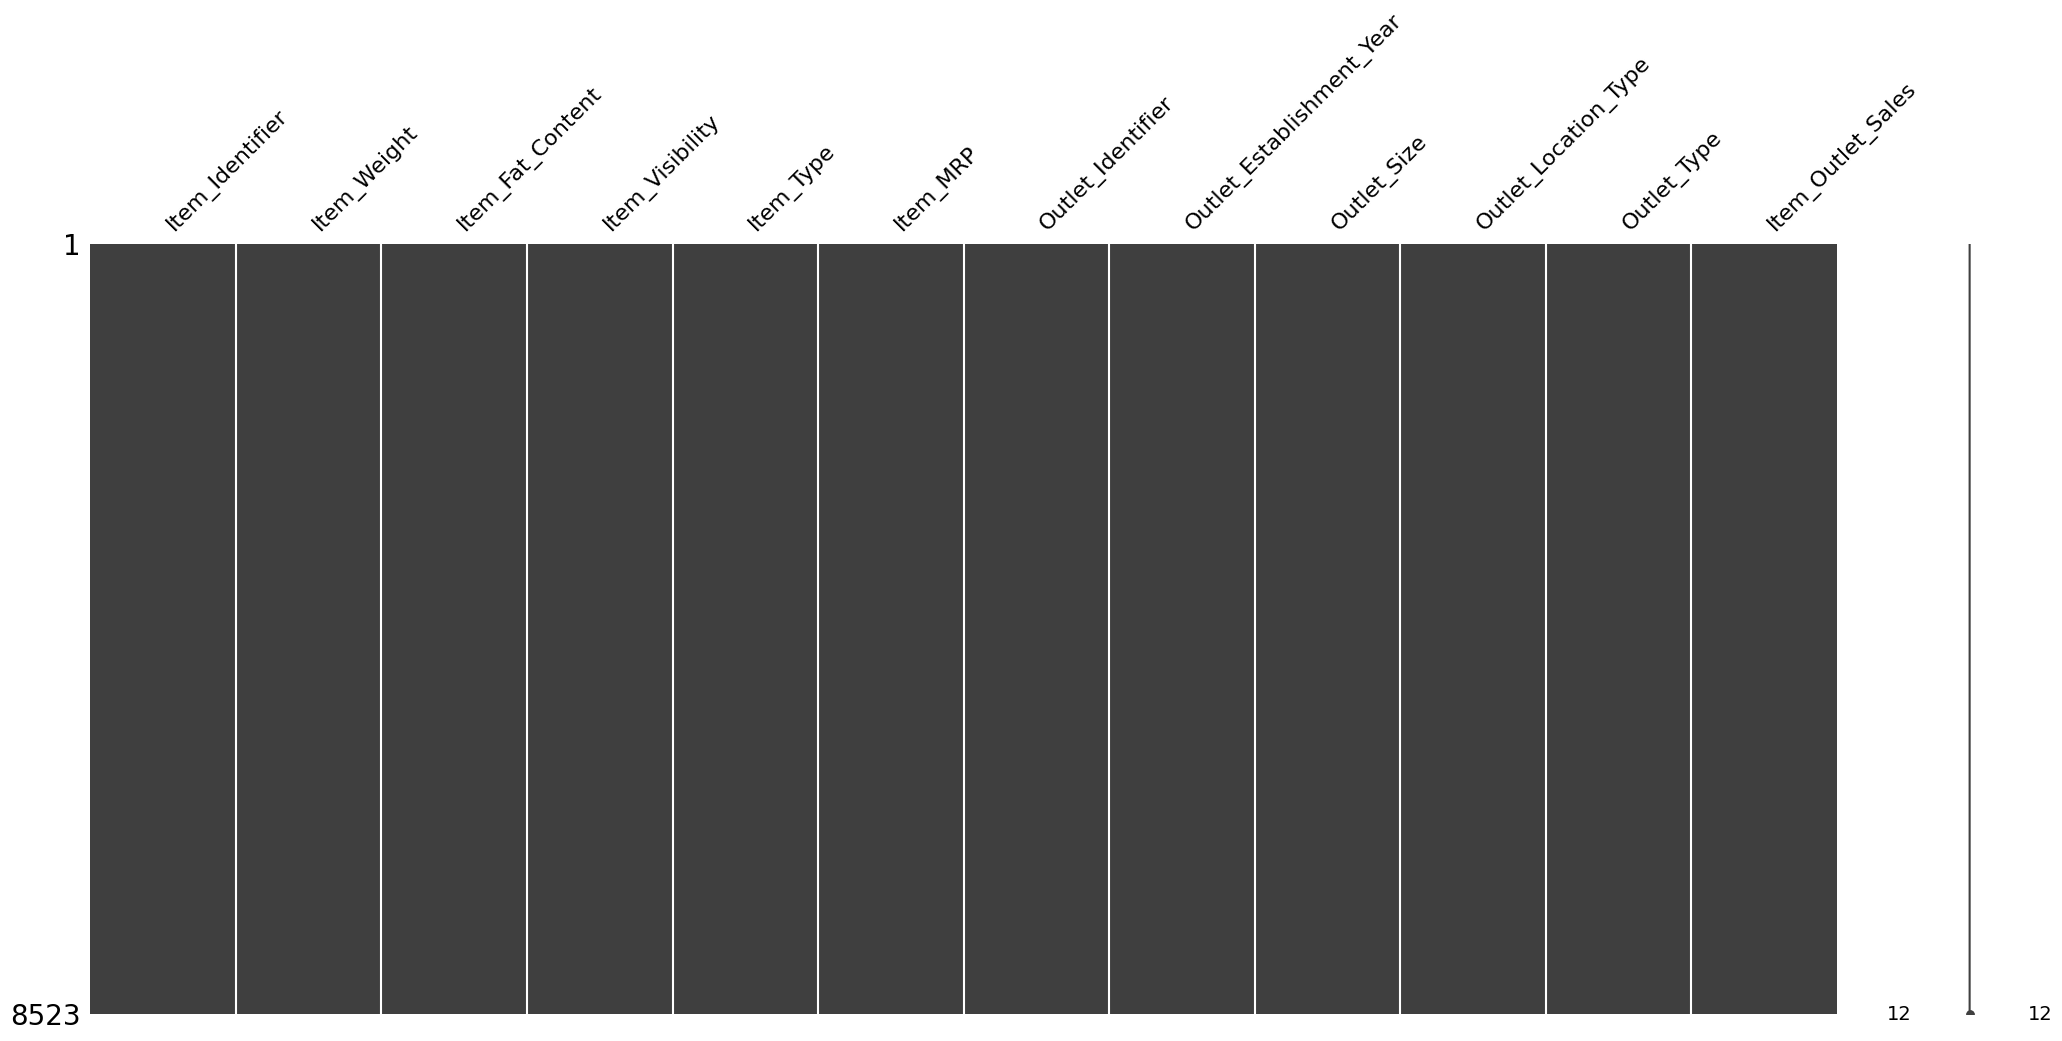

In [20]:
#through the use pf missingo
import missingno as msno
msno.matrix(df_prediction)

adressing any incosistent categories

In [21]:
# adressing any incosistent categories that are objects
obj_columns=df_prediction.select_dtypes('object').columns
obj_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [22]:
#Iterate over each object column
for col in obj_columns:
  print(f"value count for {col}")
  print(df_prediction[col].value_counts())
  print('\n')




value count for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


value count for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


value count for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


value count for Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    

In [23]:
#adressing incosistency in Item_Fat_Content
df_prediction['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [24]:
df_prediction['Item_Fat_Content'].replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"})

,Item_Fat_Content
0,Low Fat
1,Regular
2,Low Fat
3,Regular
4,Low Fat
...,...
8518,Low Fat
8519,Regular
8520,Low Fat
8521,Regular


In [25]:
df_prediction['Item_Fat_Content']=df_prediction['Item_Fat_Content'].replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"})

In [26]:
#verify the change
df_prediction['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006




statistical analysis for numbers


In [27]:
# analyzing categories that are number
num_columns=df_prediction.select_dtypes('number').columns
num_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [28]:
#Iterate over each object column and obtain the summary statistic
for col in num_columns:
  print(f"value count for {col}")
  print(df_prediction[col].describe())
  print('\n')


value count for Item_Weight
count    8523.000000
mean       10.650590
std         6.431899
min         0.000000
25%         6.650000
50%        11.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64


value count for Item_Visibility
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


value count for Item_MRP
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


value count for Outlet_Establishment_Year
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


value count for Item_Outlet_Sales
count   

## Exploratory Data Analysis

## Feature Inspection